<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Андрей! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

<font color='Blue'><b>Результат обработки ошибок в конце работы.</b></font><br><br>

# Исследование данных о продажах компьютерных игр. 

 Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры заказал исследование закономерностей, определяющих успешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и "Стримчик" планирует кампанию на 2017-й.
### Цель исследования:                            
Изучение закономерностей, определяющих успешность игр. 
### Ход исследования: 
Подготовка данных. \
Проведение исследовательского анализа данных. \
Составление портрета пользователя каждого региона. \
Проверка гипотез. \
Общие выводы.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

In [1]:
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


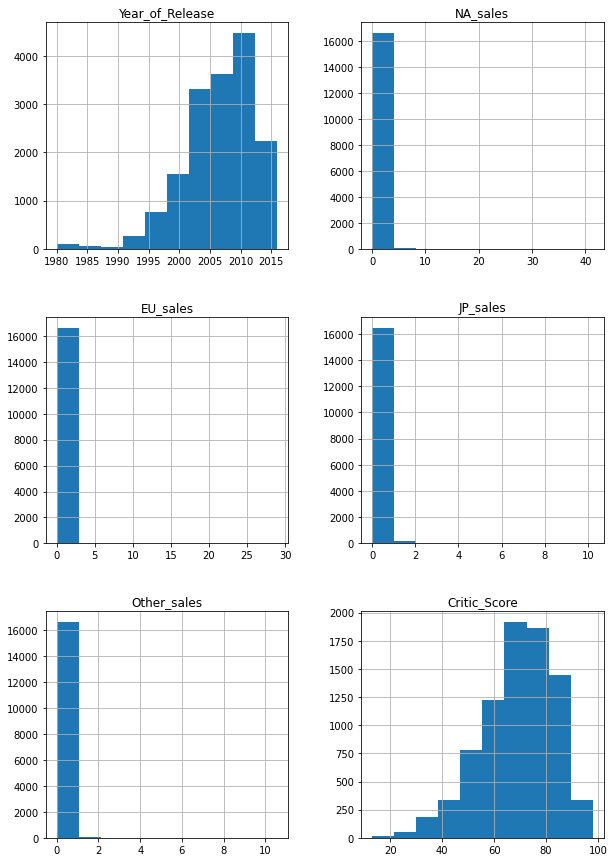

In [5]:
df.hist(figsize=(10, 15))
plt.show()

# 2. Подготовка данных

2.1 Приведение названий столбцов к нижнему регистру.

In [6]:
# Приводим названия столбцов к нижнему регистру.
df.columns = df.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Иногда пишут длинный словарь для замены колонок, как в проекте по музыке.</font>

2.2 Проверка датасета на наличие явных дубликатов.

In [7]:
# Проверяем датасет на наличие явных дубликатов
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены явные дубликаты, иногда они сильно искажают анализ.</font><br>
<font color='Red'>🛠 Но не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять лучше по имени, платформе и году релиза.</font>

2.3 Проверка на наличие неявных дубликатов.

In [8]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

</font><font color='Blue'><b>Среди названий платформ нет неявных дубликатов.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Так проверка неявных дубликатов не делается. А дубликаты есть:</font>

In [9]:
# Комментарий ревьюера 2
temp = df.copy()
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [10]:
# удаляем неявные дубликаты.
df = df.drop_duplicates(subset=['name', 'platform','year_of_release'])

2.4 Проверка на наличие пропусков.

In [11]:
# Изучаем колличество пропусков в процентном отношении. 
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


2.4.1 Поставим заглушку на пропуски в рейтинге ESRB.

In [12]:
df['rating'] = df['rating'].fillna('no rating')
df['rating'].isna().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Таким кодом заглушка на пропуски в возрастном рейтинге не поставлена.</font>

2.5 Изменяем тип данных.

In [13]:
# Изменим тип данных на нужный. 
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
# Меняем значение 'tbd' (to be determined ('пока не определено')) в столбце user_score на NaN. 
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
# Изменим тип данных на нужный.
df['user_score'] = df['user_score'].astype(float, errors='ignore')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

Изменили тип данных в столбце с годом выпуска с десятичного (например 2006.0) на целочисленный (2006). В стобце с рейтингом пользователя user_score изменили значение 'tbd' (to be determined ('пока не определено')) на NaN (пустое значение для числовых данных) и изменили тип данных object на float64 (так как рейтинги - это десятичные числа).

Так как пропуски есть только в стобцах с оценками (по причине невыставления критиками или пользователями оценок), было решено заполнение пропусков вообще не проводить. Даже для одной игры на разных платформах могут быть сильно разные оценки. Тем более, далее будет сравнение оценок на разных платформах. Можно сомнительными заполнениями только испортить всю статистику. 



2.6 Создадим новый столбец с сумарными продажами.

In [14]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

In [15]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во N

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем понятное решение, всего два пропуска в колонках `name` и `genre`, да еще в этих строках пропуски по отзывам и рейтингу. Может проще удалить?</font><br>
<font color='DarkMagenta'>👉 А про пропуски в колонке года релиза игры забыли? А если посмотреть на строчки с этими пропусками, то увидим, что там пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей. Может оценим % пропусков (их там около 1,6 %) и примем правильное решение (удалим напрочь).</font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

# 3. Исследовательский анализ данных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Обращаю внимание, что проект не имеет необходимого оформления. Проект должен иметь структру с разделами и подразделами исследования, с формулировкой промежуточной задачи, с комментариями, что мы делаем, что получили. Каждый раздел/подраздел должен начинаться с названия, отражающего его содержание, и решаемой задачи, заканчиваться промежуточным выводом. Отдельные строки кода выполняющие необходимые преобразования должны находиться в отдельных исполняемых ячейках, комментарии и промежуточные выводы должны размещаться в отдельных ячейках 'markdown'. Необходимо пройти по шагам проекта и добавить необходимые элементы. Подробнее описано в "Полезных инструкциях для учёбы".</font>

3.1 Посмотрим, сколько игр выпускалось в разные годы.

In [16]:
# Посмотрим, сколько игр выпускалось в разные годы
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

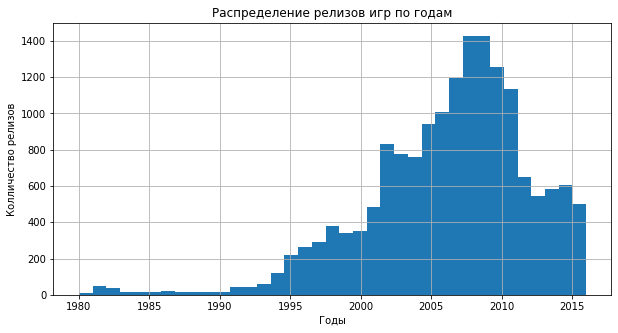

In [17]:
df['year_of_release'].hist(bins=37, figsize=(10,5))
plt.title('Распределение релизов игр по годам')
plt.xlabel('Годы')
plt.ylabel('Колличество релизов')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Визуализация данных графиками и диаграммами подразумевает подписи всех осей, название графика, при необходимости наличие меток. Это относится ко всем графикам/диаграммам проекта и является критической ошибкой.</font><br>
<font color='Red'>🛠 Для того, что бы гистограмма отражала выпуск игр по годам надо подобрать параметр `bins` равный количеству годов релиза в нашем датасете, только надо учитывать первый и последний года релиза в этом диапазоне. Тогда не будет пиков на графике. </font><br>
<font color='DarkMagenta'>👉 А можно, что бы не расчитывать `bins`, построить столбчатую диаграмму, она сама выведет необходимое количество годов релиза.</font>

</font><font color='Blue'><b>Изменино колличество bins на 37.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Красивые и информативные графики всегда приветствуются, особенно когда на них есть все подписи осей, названия меток и название графика. Как правило, заказчик не является аналитиком и ему трудно по коду разбираться, что изображено на диаграммах. Кроме того, в презентацию реального проекта в основном идут именно скрины графиков, таблицы мало информативны. По этому необходимо сразу графики максимально описывать.</font>

За период с 2005 по 2011 год выпускалось наибольшее колличество игр. Это наиболее важный период по данным. Меньше всего игр выпускалось в 80-х, затем идут 90-е. Спад с 2011 года возможно связан с ростом популярности смартфонов и мобильных игр.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Этот комментарий должен быть в ячейке Markdown, а не в ячейке кода. Проект должен иметь структуру отделяющую код от комментариев, что мы делаем и результатов преобразования.</font>
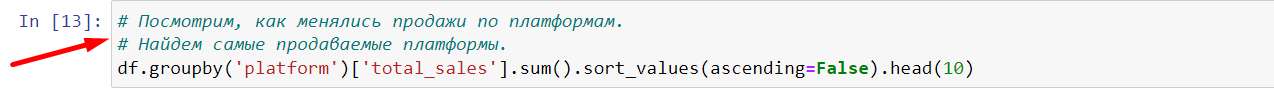

3.2 Посмотрим, как менялись продажи по платформам.\
Найдем самые продаваемые платформы.

In [18]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При анализе принято визуализировать результаты в виде графиков или диаграмм. Таблицы малоинформативны и не наглядны. Можно вот так:</font>
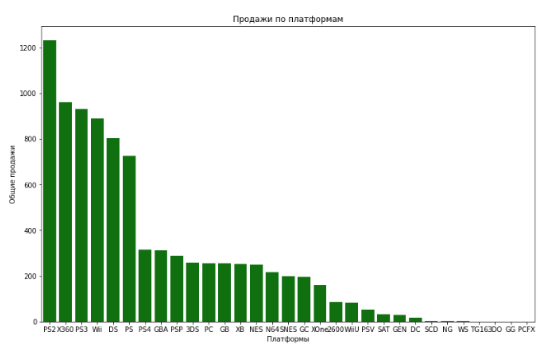

<font color='Blue'><b>Для дальнйшего анализа выберем период с 2012 года Для целей прогнозирования продаж на следующий год \
редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе \
не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период \ не подходит для прогнозирования, так что надо выбирать золотую середину - 4 года </b></font><br>

3.3 Возьмем первые 4 платформы и покажем как менялись их продажи на графике.

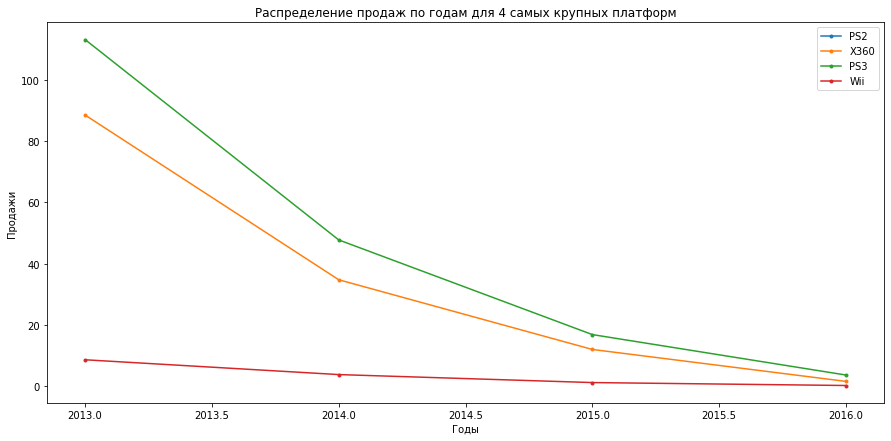

In [19]:
PS2 = df.loc[(df['platform'] == 'PS2') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()
X360 = df.loc[(df['platform'] == 'X360') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()
PS3 = df.loc[(df['platform'] == 'PS3') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()
Wii = df.loc[(df['platform'] == 'Wii') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()

plt.figure(figsize=(15,7))
plt.plot(PS2, '.-', label='PS2')
plt.plot(X360, '.-', label='X360')
plt.plot(PS3, '.-', label='PS3')
plt.plot(Wii, '.-', label='Wii')
plt.title('Распределение продаж по годам для 4 самых крупных платформ')
plt.legend()
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Диаграмма не оформлена необходимым образом. Здесь и далее в проекте.<br>Если есть с этим трудности, то следует обратиться за помощью к преподавателю.</font>

Наглядно видно приблизительный срок жизни платформы - 10 лет. Топ-3 самых продаваемых платформ приходится приблизительно на период с 2006 по 2016 год. Причем, в последние 5 лет продажи падают для всех 4х самых продаваемых за все время платформ.

Для дальнейшего анализа за актуальный период примем десятилетие с 2005 по 2016 год. Эти данные помогут построить прогноз на 2017 год.

3.4 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
Посмотрим на лидеров по прадажам за последние 3 года.

<font color='Blue'><b>Для дальнйшего анализа выберем период с 2013 года Для целей прогнозирования продаж на следующий год \
редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе \
не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период \ не подходит для прогнозирования, так что надо выбирать золотую середину - 3 года </b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 На практике приходится проводить несколько итераций иследования, изменяя период. Период с которого результат анализа перестает изменяться, принимаем актуальным. Плюс учитываем бизнес-практику отрасли, по которой делаем проект. Аналитику все равно приходится погружаться в бизнес процессы, что бы понимать данные датасета, которые как раз и отражают эти процессы. В нашем случае, 5 лет это примерно половина срока жизни платформы.</font>

In [20]:
# Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
# Посмотрим на лидеров по прадажам за последние 3 года.
df.loc[df['year_of_release'] > 2012].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font> <br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br>Не учитывайте в работе данные за предыдущие годы.</b> <br>
И далее мы должны делать исследование именно за актуальный период.</font><br>
<font color='Red'>🛠 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год).</font>

In [21]:
# Комментарий ревьюера
df.year_of_release.min()

1980

3.5 Построем графики для топ-3. Чтобы посмотреть как обстоят дела за недавнее время.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Ошибка не исправлена. Для анализа не используется датасет актуального периода.</font>

<font color='Blue'><b>Возьмем за актуальный период 3 года, данные ранее этого периода не будем учитывать в исследывании.</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Зачем каждый раз фильтруем исходный датасет по году релиза? Надо создать датасет актуального периода и далее работать только с ним. А так есть вероятность сделать ошибку при очередной фильтрации.</font>

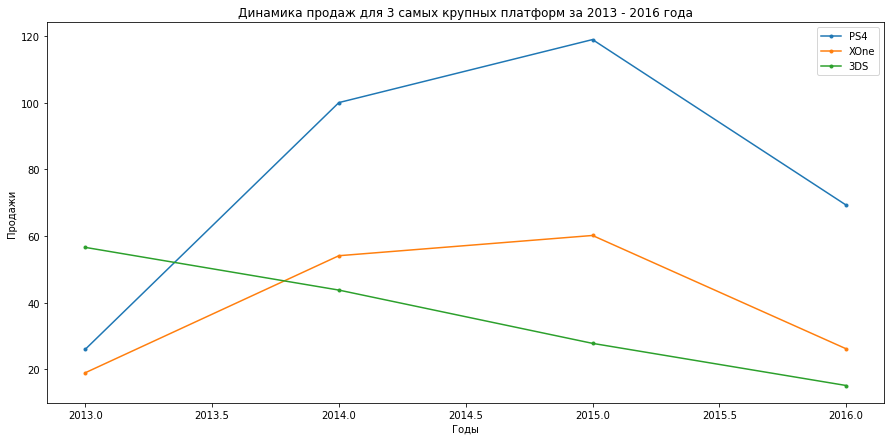

In [22]:
PS4 = df.loc[(df['platform'] == 'PS4') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()
XOne = df.loc[(df['platform'] == 'XOne') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()
_3DS = df.loc[(df['platform'] == '3DS') & (df['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum()

plt.figure(figsize=(15,7))
plt.plot(PS4, '.-', label='PS4')
plt.plot(XOne, '.-', label='XOne')
plt.plot(_3DS, '.-', label='3DS')
plt.title('Динамика продаж для 3 самых крупных платформ за 2013 - 2016 года')
plt.legend()
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

Как видим продажи для трех самых продаваемых платформ за последнее время снижаются. Сопоставив эту информацию с предыдущим графком, который также показывает устойчивое снижение продаж, можно сделать вывод, что весь рынок игр падает.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Нет названия подраздела и не сформулирована задача. Не понятно, что и зачем делаем далее.</font>

3.6 Построим график «ящик с усами» по глобальным продажам игр.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода. И так во всем разделе.</font>

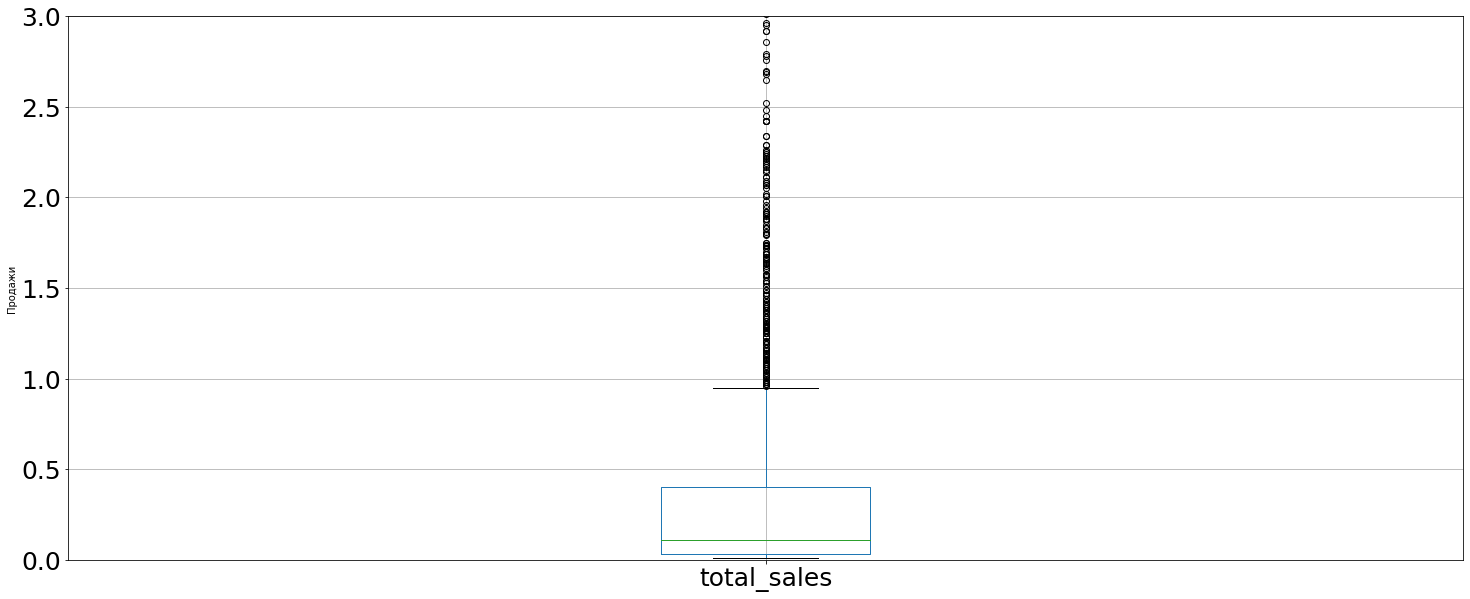

In [23]:
# Построим график «ящик с усами» по глобальным продажам игр. 
df[df['year_of_release'] > 2012].boxplot(column='total_sales', fontsize=25, figsize=(25,10))
plt.ylim(0, 3)
plt.ylabel('Продажи')
plt.show()

Вольшинство продаж (95%) до 1,2 млн долларов. Медиана - 0,2 миллиона долларов.

3.7 Построим графики для самых успешных платформ.

3.7.1 PS2

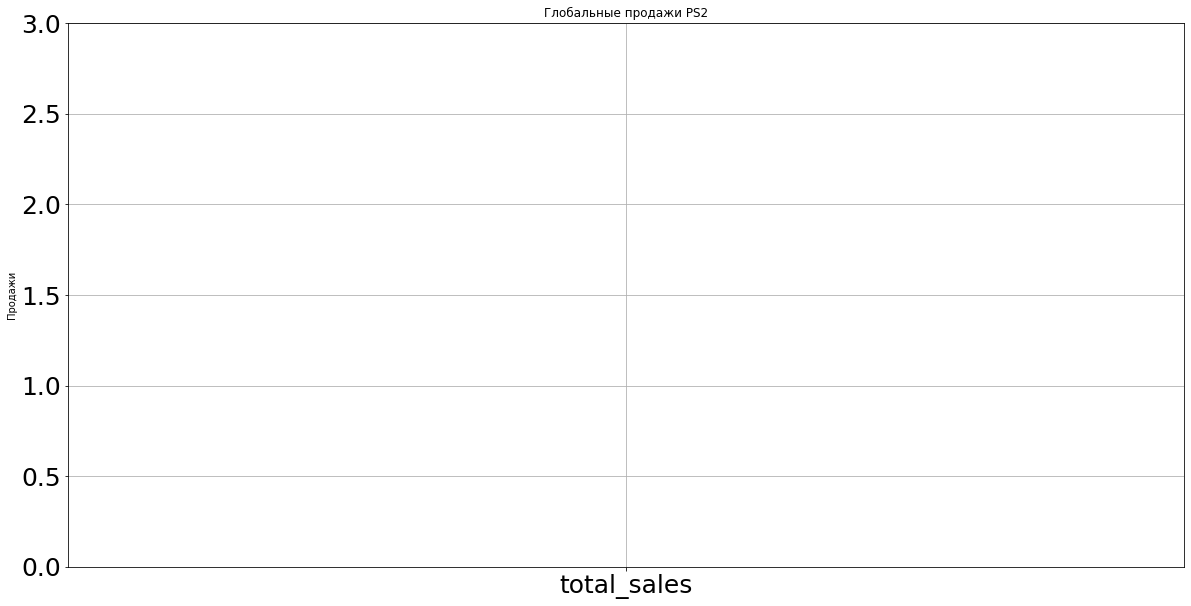

In [24]:
# Построим графики для самых успешных платформ.
# PS2:
df[(df['platform'] == 'PS2') & (df['year_of_release'] > 2012)].boxplot(column='total_sales', fontsize=25, figsize=(20,10))
plt.ylim(0, 3)
plt.title('Глобальные продажи PS2')
plt.ylabel('Продажи')
plt.show()

3.7.2 X360

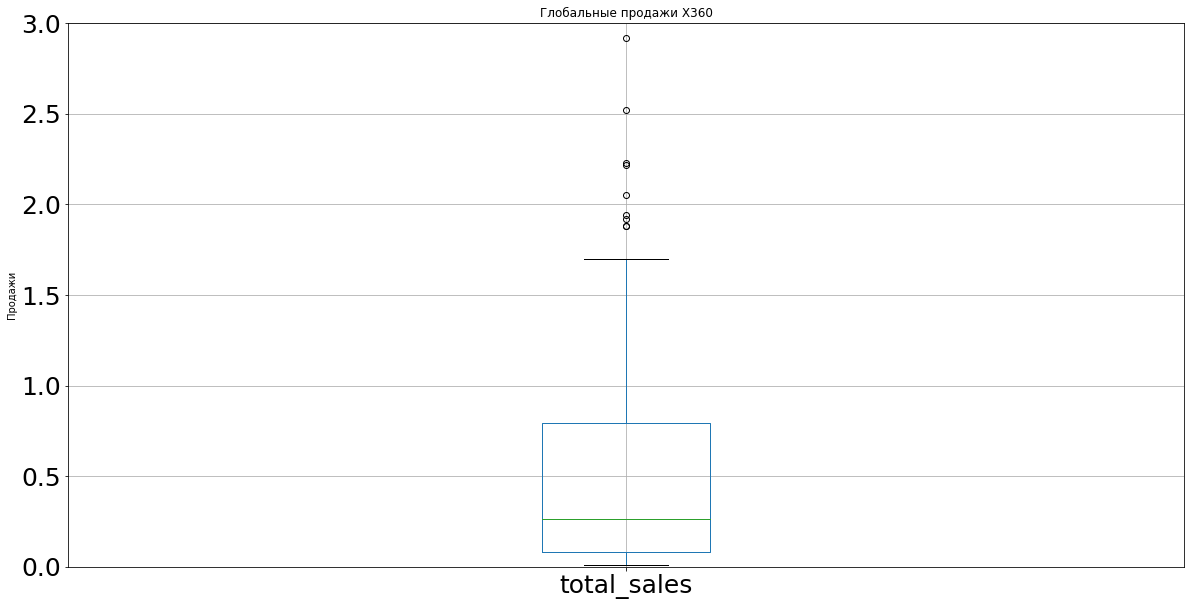

In [25]:
# X360:
df[(df['platform'] == 'X360') & (df['year_of_release'] > 2012)].boxplot(column='total_sales', fontsize=25, figsize=(20,10))
plt.ylim(0, 3)
plt.title('Глобальные продажи X360')
plt.ylabel('Продажи')
plt.show()

3.7.3 PS3

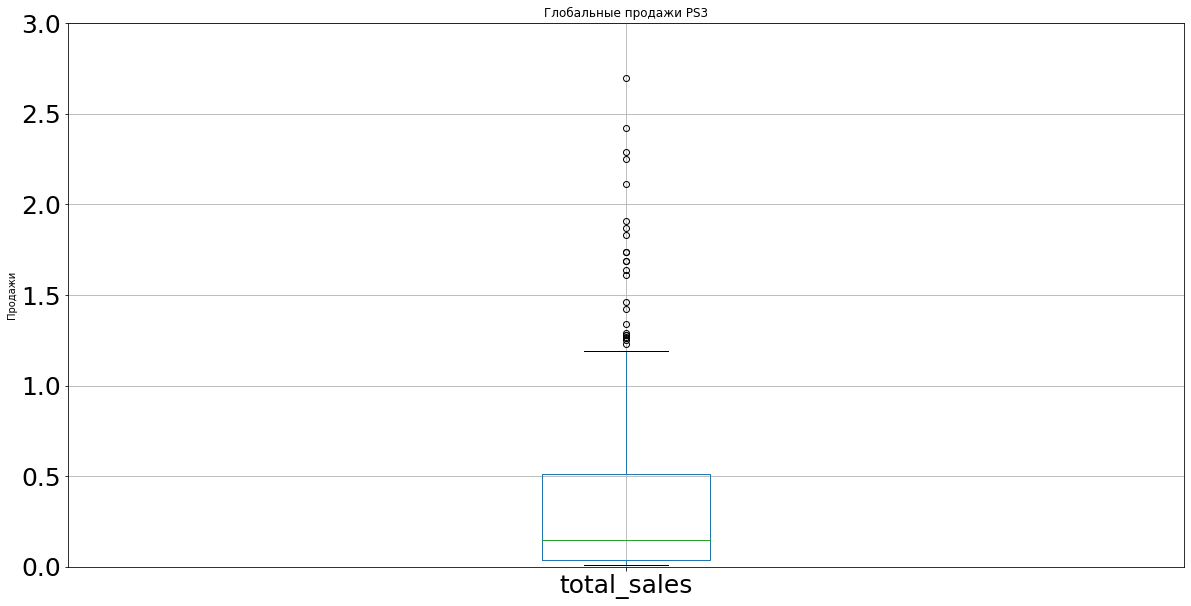

In [26]:
# PS3:
df[(df['platform'] == 'PS3') & (df['year_of_release'] > 2012)].boxplot(column='total_sales', fontsize=25, figsize=(20,10))
plt.ylim(0, 3)
plt.title('Глобальные продажи PS3')
plt.ylabel('Продажи')
plt.show()

3.7.4 Wii

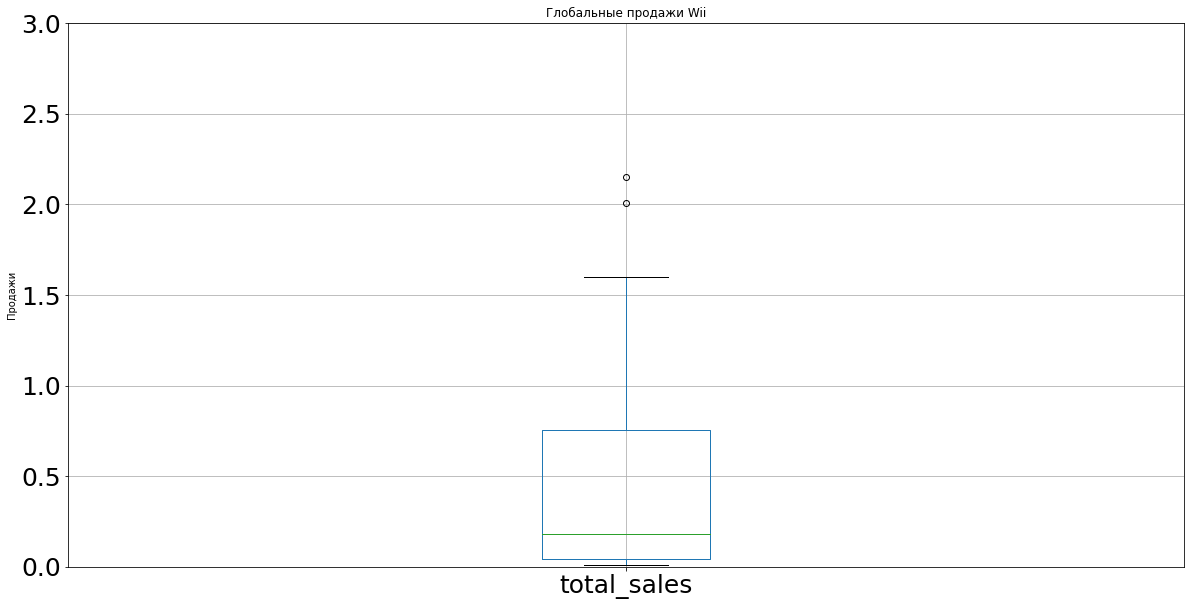

In [27]:
# Wii:
df[(df['platform'] == 'Wii') & (df['year_of_release'] > 2012)].boxplot(column='total_sales', fontsize=25, figsize=(20,10))
plt.ylim(0, 3)
plt.title('Глобальные продажи Wii')
plt.ylabel('Продажи')
plt.show()

3.7.5 DS

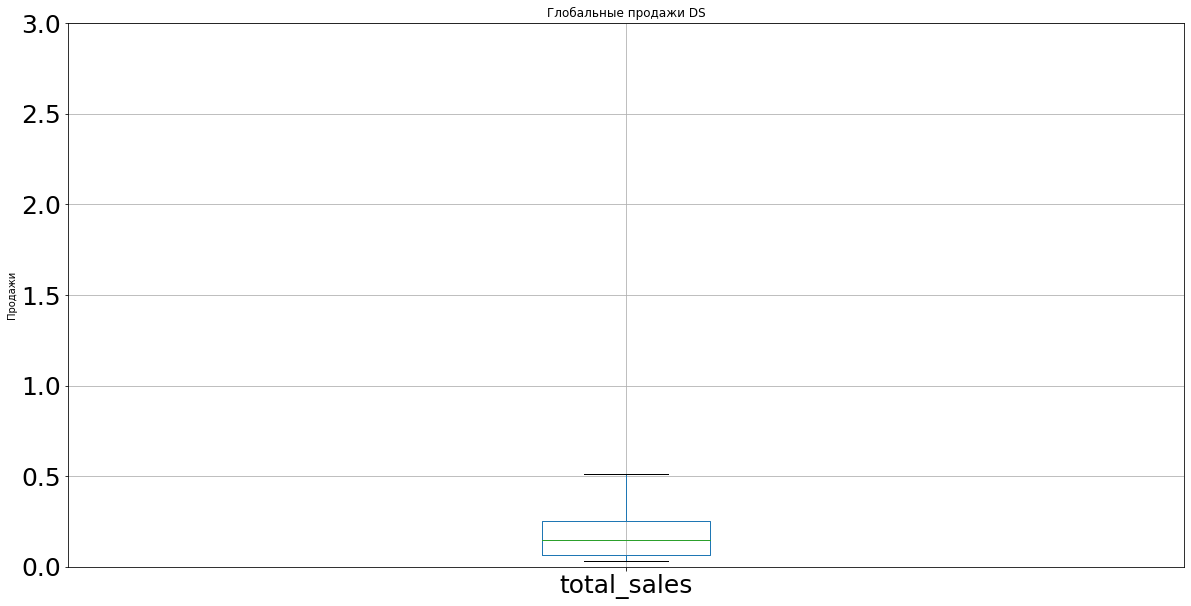

In [28]:
# DS:
df[(df['platform'] == 'DS') & (df['year_of_release'] > 2012)].boxplot(column='total_sales', fontsize=25, figsize=(20,10))
plt.ylim(0, 3)
plt.title('Глобальные продажи DS')
plt.ylabel('Продажи')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Почему строим диаграммы размаха не по всем платформам? В задании топ-платформы не требуются, предполагаются все за актуальный период. Таким образом можно потерять значимую информацию. <br>Видимо, ввело в заблуждение предыдущее задание, где надо было определить лидеров. Но в заданиях на проект отдельно указывается, где необходимо анализировать топ.<br> Всегда при анализе следует использовать все данные, а потом можно их фильтровать от лишней информации.<br>А диаграммы размаха надо строить на одной координатной сетке в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами. Для вывода только нижней части boxplot-ов необходимо использовать параметр ylim. Пример ниже. Анализ должен заканчивать промежуточными выводами, здесь они не сделаны.</font>
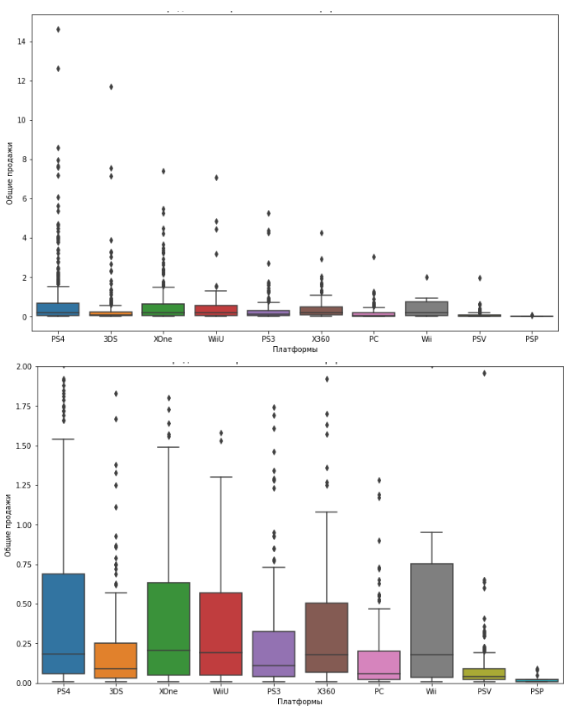

<font color='Blue'><b>У меня никак не получается сделать такой график, можешь помочь?</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 На последнем ревью, если не забуду.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Не забыл.</font>

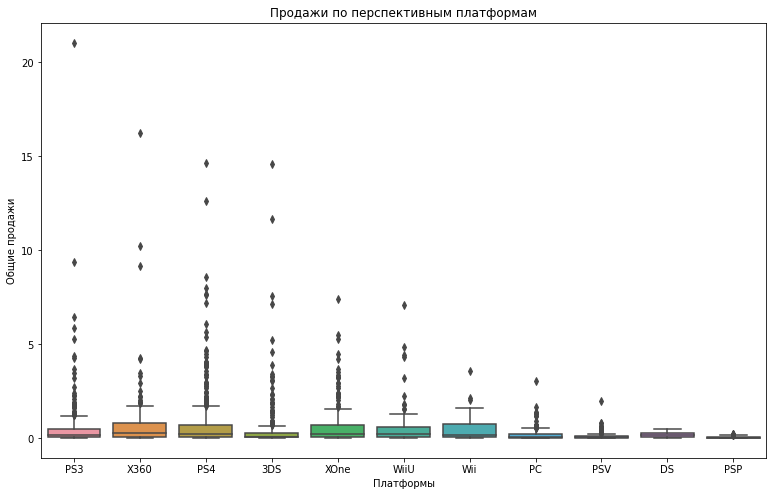

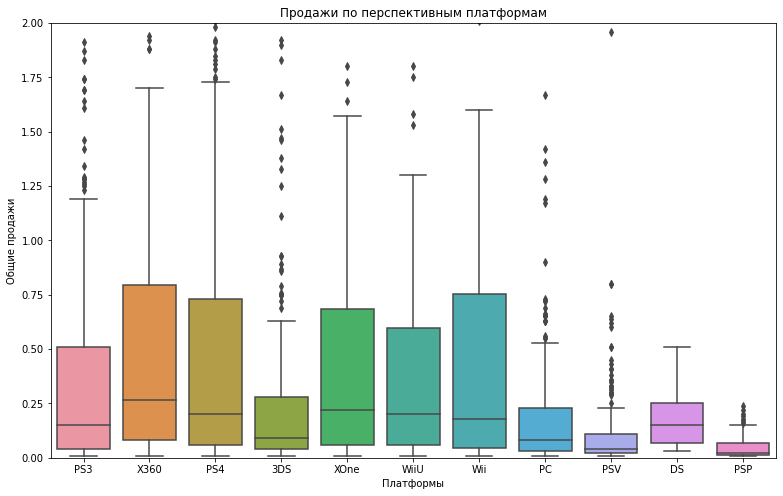

In [62]:
# Комментарий ревьюера 3
import seaborn as sns
data_temp, y = df[df['year_of_release'] > 2012].copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И тут нет названия подраздела.</font>

3.8 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами для PS3.\
3.8.1 Сначала посмотрим на зависимость между продажами и оценкой критиков.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Во всем разделе для анализа не используется датасет актуального периода.</font>

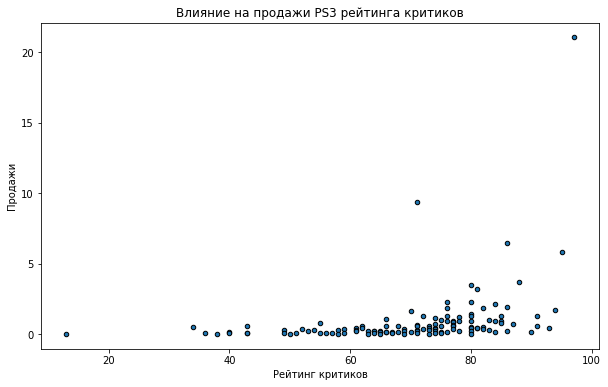

In [29]:
# Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
# Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами для PS3.
# Сначала посмотрим на зависимость между продажами и оценкой критиков.
ps3_games = df[(df['platform'] == 'PS3') & (df['year_of_release'] > 2012)].copy()
ps3_games.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи PS3 рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не понятно, зачем фильтруются значения больше нуля?</font>

В среднем, чем больше оценка критиков, тем больше продажи.

3.8.2 Теперь посмотрим на зависимость между продажами и оценками пользователей.

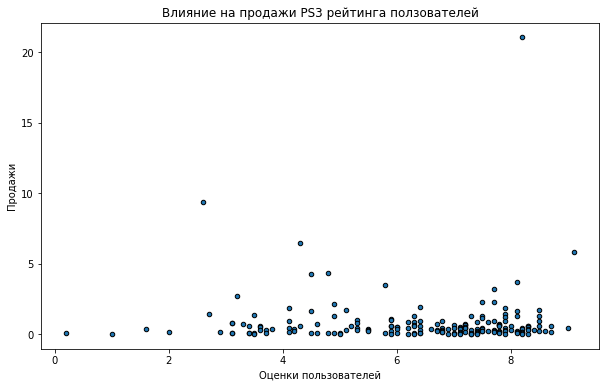

In [30]:
# Теперь посмотрим на зависимость между продажами и оценками пользователей.
ps3_games = df[(df['platform'] == 'PS3') & (df['year_of_release'] > 2012)].copy()
ps3_games.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи PS3 рейтинга ползователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

Зависимость похожа на предыдущую, но есть больше выбросов с низкими оценками и высокми продажами, оценки пользователей более хаотичны.

3.8.3 Посмотрим корреляцию.

In [31]:
# Посмотрим корреляцию.
ps3_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.217596,-0.167604,-0.195894,-0.181897,-0.167495,-0.270341,-0.201274
na_sales,-0.217596,1.000000,0.874896,0.439867,0.932098,0.335205,-0.013560,0.954921
eu_sales,-0.167604,0.874896,1.000000,0.443809,0.975743,0.309561,-0.022848,0.974740
jp_sales,-0.195894,0.439867,0.443809,1.000000,0.459609,0.302327,0.244048,0.516258
other_sales,-0.181897,0.932098,0.975743,0.459609,1.000000,0.315748,0.004633,0.989812
critic_score,-0.167495,0.335205,0.309561,0.302327,0.315748,1.000000,0.599920,0.334285
user_score,-0.270341,-0.013560,-0.022848,0.244048,0.004633,0.599920,1.000000,0.002394
total_sales,-0.201274,0.954921,0.974740,0.516258,0.989812,0.334285,0.002394,1.000000


Коэффициенты корреляции Пирсона для отзовов критиков (0.33) положтельный, значит есть зависимость - как и показали графики, если оценки высокие, то и продажи высокие. А вот корреляция с оценками пользователей очень низкая (0.002), то есть они почти не  влияют на итоговые продажи.

3.9 Соотнесем выводы с продажами игр на других платформах.

3.9.1 PS4

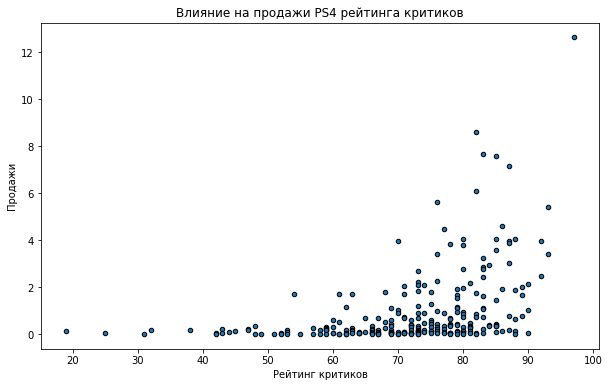

In [32]:
ps4_games = df[(df['platform'] == 'PS4') & (df['year_of_release'] > 2012)].copy()
ps4_games.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи PS4 рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show()

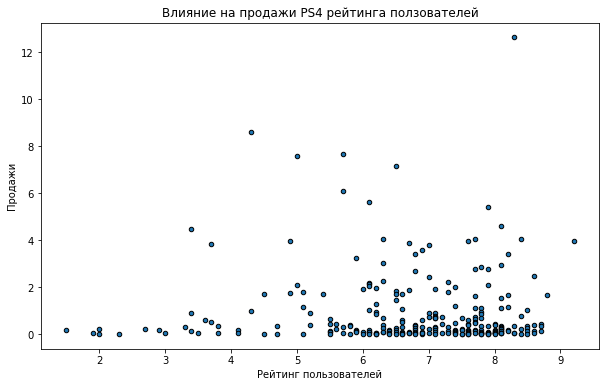

In [33]:
ps4_games = df[(df['platform'] == 'PS4') & (df['year_of_release'] > 2012)].copy()
ps4_games.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи PS4 рейтинга ползователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show()

In [34]:
# Соотнесем выводы с продажами игр на других платформах.
# PS4:
ps4_games = df[(df['platform'] == 'PS4') & (df['year_of_release'] > 2012)].copy()
ps4_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


3.9.2 XOne:

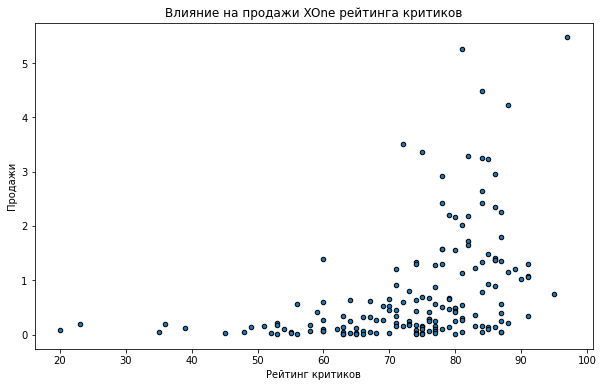

In [35]:
xone_games = df[(df['platform'] == 'XOne') & (df['year_of_release'] > 2012)].copy()
xone_games.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи XOne рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show()

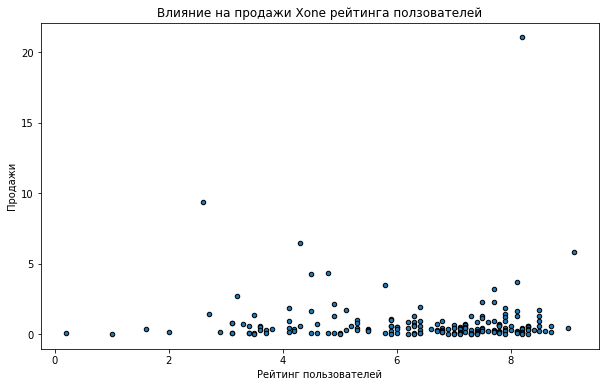

In [36]:
xone_games = df[(df['platform'] == 'XOne') & (df['year_of_release'] > 2012)].copy()
ps3_games.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи Xone рейтинга ползователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show()

In [37]:
# XOne:
xone_games = df[(df['platform'] == 'XOne') & (df['year_of_release'] > 2012)].copy()
xone_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


3.9.3 PS2:

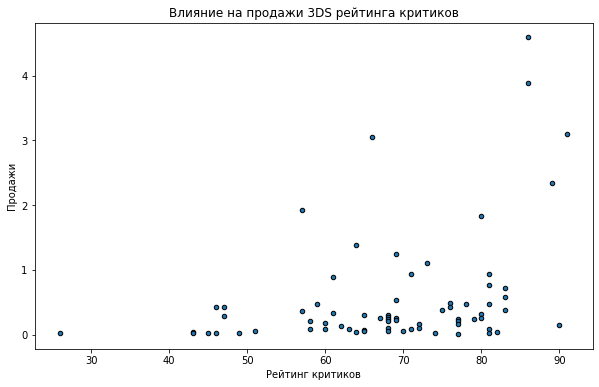

In [38]:
_3ds_games = df[(df['platform'] == '3DS') & (df['year_of_release'] > 2012)].copy()
_3ds_games.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи 3DS рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show()

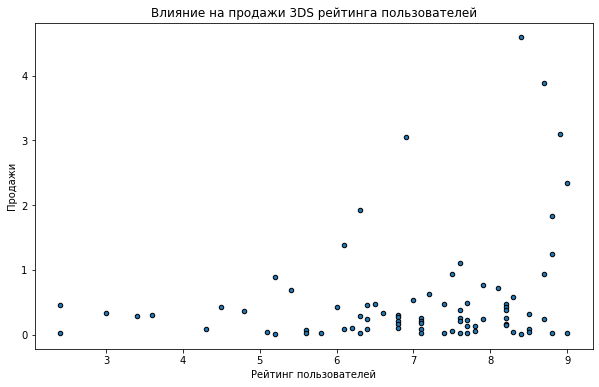

In [39]:
_3ds_games = df[(df['platform'] == '3DS') & (df['year_of_release'] > 2012)].copy()
_3ds_games.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи 3DS рейтинга пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show()

In [40]:
# 3DS:
_3ds_games = df[(df['platform'] == '3DS') & (df['year_of_release'] > 2012)].copy()
_3ds_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.075933,-0.115177,-0.063487,-0.083695,0.166254,0.240047,-0.090086
na_sales,-0.075933,1.000000,0.931893,0.641878,0.993708,0.369653,0.241036,0.938867
eu_sales,-0.115177,0.931893,1.000000,0.633982,0.958274,0.268851,0.114930,0.927821
jp_sales,-0.063487,0.641878,0.633982,1.000000,0.645306,0.301810,0.259370,0.854173
other_sales,-0.083695,0.993708,0.958274,0.645306,1.000000,0.354365,0.209418,0.945649
critic_score,0.166254,0.369653,0.268851,0.301810,0.354365,1.000000,0.769536,0.357057
user_score,0.240047,0.241036,0.114930,0.259370,0.209418,0.769536,1.000000,0.241504
total_sales,-0.090086,0.938867,0.927821,0.854173,0.945649,0.357057,0.241504,1.000000


3.9.4 X360:

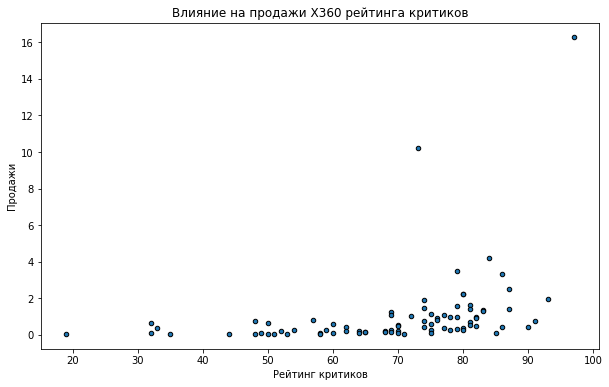

In [41]:
x360_games = df[(df['platform'] == 'X360') & (df['year_of_release'] > 2012)].copy()
x360_games.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи X360 рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show()

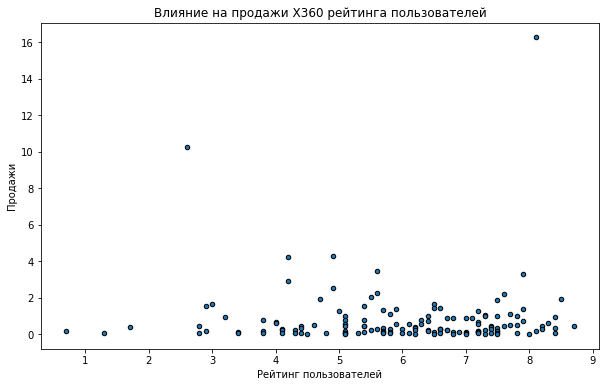

In [42]:
x360_games = df[(df['platform'] == 'X360') & (df['year_of_release'] > 2012)].copy()
x360_games.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.title('Влияние на продажи X360 рейтинга пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show()

In [43]:
# X360:
x360_games = df[(df['platform'] == 'X360') & (df['year_of_release'] > 2012)].copy()
x360_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.218293,-0.203537,-0.285360,-0.218199,-0.245439,-0.248736,-0.220495
na_sales,-0.218293,1.000000,0.866574,0.634340,0.985236,0.342724,-0.012298,0.984299
eu_sales,-0.203537,0.866574,1.000000,0.612002,0.934769,0.336418,-0.009435,0.941008
jp_sales,-0.285360,0.634340,0.612002,1.000000,0.641529,0.290613,0.112592,0.648860
other_sales,-0.218199,0.985236,0.934769,0.641529,1.000000,0.349204,-0.018868,0.998640
critic_score,-0.245439,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.248736,-0.012298,-0.009435,0.112592,-0.018868,0.520946,1.000000,-0.011742
total_sales,-0.220495,0.984299,0.941008,0.648860,0.998640,0.350345,-0.011742,1.000000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> Предполагается, что мы построим диаграммы рассеяния, а не только посчитаем корреляции и для других платформ. Выводы, сделанные на основе расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять.  Построение диаграмм рассеяния и расчет корреляции можно сделать циклом по каждой платформе и по каждому виду отзывов.</font>

Коэффициент корреляции между продажами и оценкой критикой почти идентичен на популярных платформах в районе 0.30 - 0.40. 
Корреляця между прибылью и оценкам пользователей почти у всех платворм нулевая, кроме 3DS от Нинтендо - у нее 0.24, видимо в Японии, где эта приставка очень популярна, принято доверять пользовательским оценкам.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
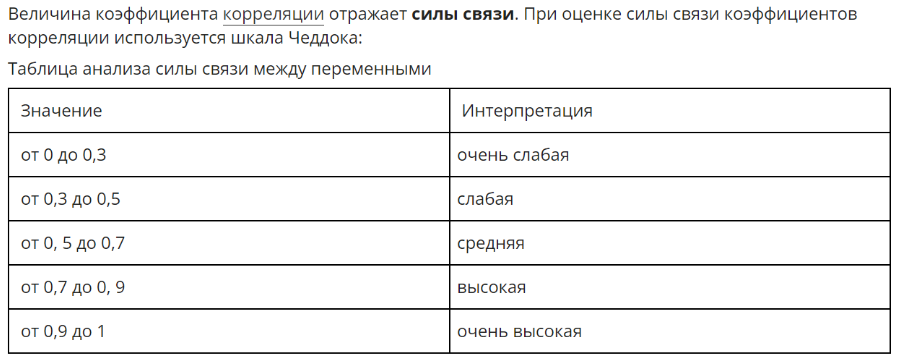

3.10 Посмотрим на общее распределение игр по жанрам.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода.</font>

In [44]:
# Посмотрим на общее распределение игр по жанрам. 
df.loc[df['year_of_release'] > 2012, 'genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

Больше всего игр жанра Action и Sport.

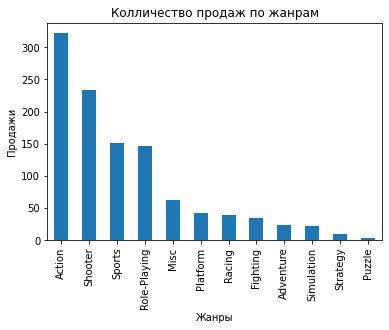

In [45]:
df[df['year_of_release'] > 2012].groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.title('Колличество продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

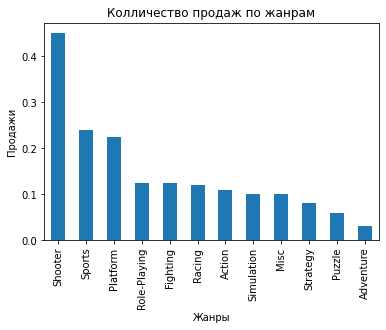

In [46]:
df[df['year_of_release'] > 2012].groupby('genre')['total_sales'].agg('median').sort_values(ascending=False).plot(kind='bar')
plt.title('Колличество продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

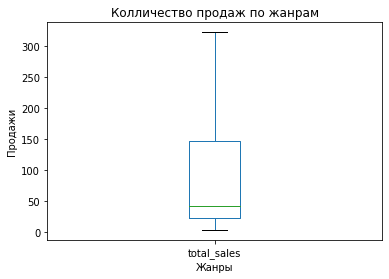

In [47]:
df[df['year_of_release'] > 2012].groupby(df['genre'])['total_sales'].agg('sum').sort_values(ascending=False).plot(kind='box')
plt.title('Колличество продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

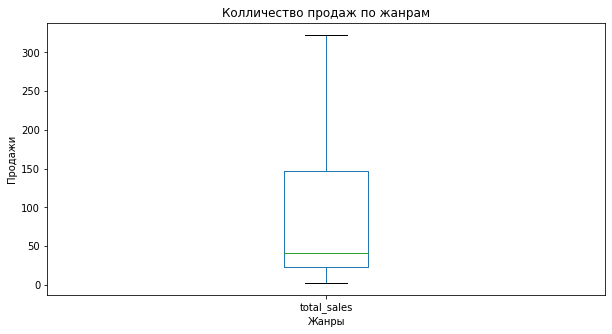

In [48]:
df[df['year_of_release'] > 2012].groupby('genre')['total_sales'].agg('sum').plot(kind='box', figsize=(10,5))
plt.title('Колличество продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Ожидаемо те же жанры (Action и Sports) лидеры и по продажам. Похоже спортивные игры стоят дороже, потому что при меньшем колличестве, приносят почти сопоставимую прибыль. Игры жанров Strategy и Puzzle находятся внизу рейтинга как по колличеству, 
так и по выручке, видимо это связано со сложностью этих игр (создание этих игр и их освоение пользователями). 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

<font color='Blue'><b>Не понимаю что написано выше фиолетовым цветом, игры стоят приблизительно одинаково, какие больше продаются такие и самые прибыльные. Разве нет? Речь же о жанрах, независимо от платформ. Люди любят какой-то жанр и покупают игры этог жанра на ту платформу, которая есть у них. Я не знаю, что значит медианные продажи, есть медианная цена продажи, ее я показал. У платформеров самая высокая медиана цены, видимо раньше игры стоили дороже. остальные цены распределены примерно также Sports, Action и Shooter впереди. Я хочу менять промежуточные выводы, здравый смысл подсказывает мне что именно эти жанры самые прибыльные, и датасет это подтверждает. Также у меня опять проблемы с отображением боксплотов на одном графике. </b></font><br><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 При анализе на датасете актуального периода все станет очевидным. А медиану показывает  боксплот:</font>
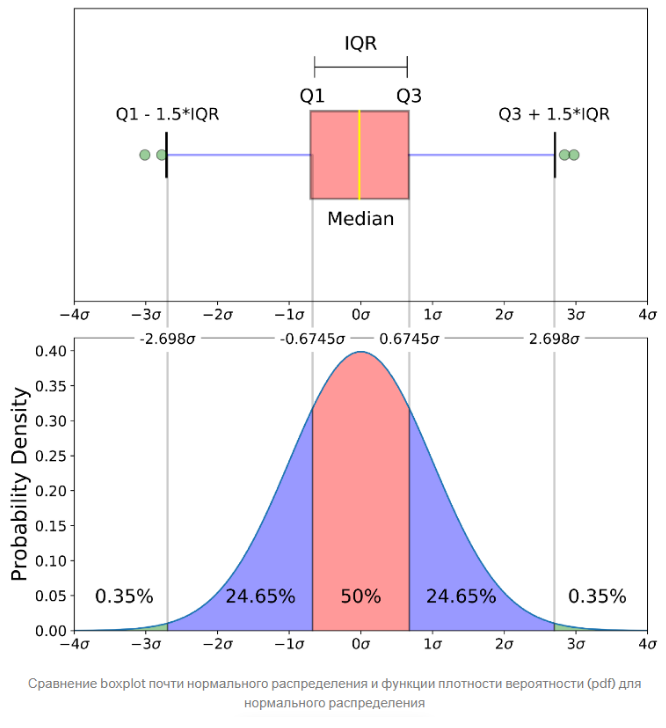

# 4. Составление портрета пользователя каждого региона.

4.1 Определим для пользователя каждого региона (NA, EU, JP):\
Самые популярные платформы (топ-5)\
4.1.1 В Северной Америке:

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода.</font>

In [49]:
# Определим для пользователя каждого региона (NA, EU, JP):
# Самые популярные платформы (топ-5). 
# В Северной Америке:
df[df['year_of_release'] > 2012].groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Самая популярная платформа в Северной Америке PS4, от нее немного отстает XOne, затем идут X360, PS3 и 3DS соответственно.

4.1.2 В Европе:

In [50]:
# В Европе:
df[df['year_of_release'] > 2012].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

В Европе PS3 поднялась на 2ое место, остальное распределение мест такое же.

4.1.3 В Японии:

In [51]:
# В Японии:
df[df['year_of_release'] > 2012].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Японский рейтинг сильно отличается. Там очень любят местную консоль 3DS и не так быстро переходят с PS3 на PS4 (занимает лишь 4ое место), а так же любят PSV и WiiU. Приставок же от Микрасофт (XOne и X360) вообще нету в топ-5. 

4.2 Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP):\
4.2.1 В Северной Америке:

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода.</font>

In [52]:
# Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP):
# В Северной Америке:
df[df['year_of_release'] > 2012].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Самым популярным жанром в Северной Америке стал Action, затем идет Sports, Shooter, Platform и Misc (игры смешанного жанра).

4.2.2 В Европе:

In [53]:
# В Европе:
df[df['year_of_release'] > 2012].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Предпочтения европейцев схожи с американскими, но место Platform занял Racing. 

4.2.3 В Японии:

In [54]:
# В Японии:
df[df['year_of_release'] > 2012].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. Здесь этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
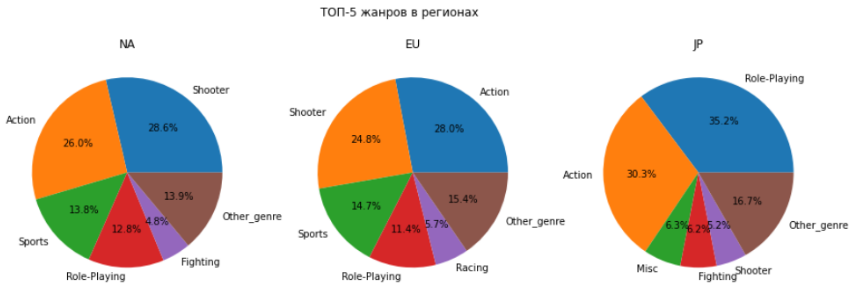

Сразу бросается в глаза то, как популярен в Японии жанр RPG (Role-PLaying game), остальные жанры распределяются схожим 
с Северной Америкой и Европой образом. 

4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?\
4.3.1 В Северной Америке:

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода.</font>

In [55]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
# В Северной Америке:
df[df['year_of_release'] > 2012].groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()

rating
M            165.21
no rating     89.42
E             79.05
E10+          54.24
T             49.79
Name: na_sales, dtype: float64

В Северной Америке самые популярные - игры с рейтингом Е (everyone - для всех), затем почти с одинаковым результатом идут рейтинги Т (teen - 13-19 лет) и М (mature - старше 17 лет), 4 и 5 места заняли рейтинги Е10+ (для всех старше 10 лет) и К-А (for Kids to Adults - для всех (устар.)). 

4.3.2 В Европе:

In [56]:
# В Европе:
df[df['year_of_release'] > 2012].groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()

rating
M            145.32
E             83.36
no rating     78.91
E10+          42.69
T             41.95
Name: eu_sales, dtype: float64

Европейский рейтинг схож с Северо Американским, но рейтинги Т и М поменялись местами, а место рейтинга К-А 
с микроскопическим результатом занял рейтинг АО (Adults Only - только для взрослых).

4.3.3 В Японии:

In [57]:
# В Японии:
df[df['year_of_release'] > 2012].groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()

rating
no rating    85.05
T            20.59
E            15.14
M            14.11
E10+          5.89
Name: jp_sales, dtype: float64

<font color='Blue'><b>К сожелению, рейтинг ЕSRB работает только в Северной Америке, поэтому для других регионов исследование его влияния на продажи не проследить, собенно в Японии. Но в целом, соотношение между возрастными группами то же самое, да и как может быть по другому, в Европе и в Японии не станут продавать взрослые игры детям. </b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, код установки на пропуски заглушки в разделе предобработки не правильный.</font>
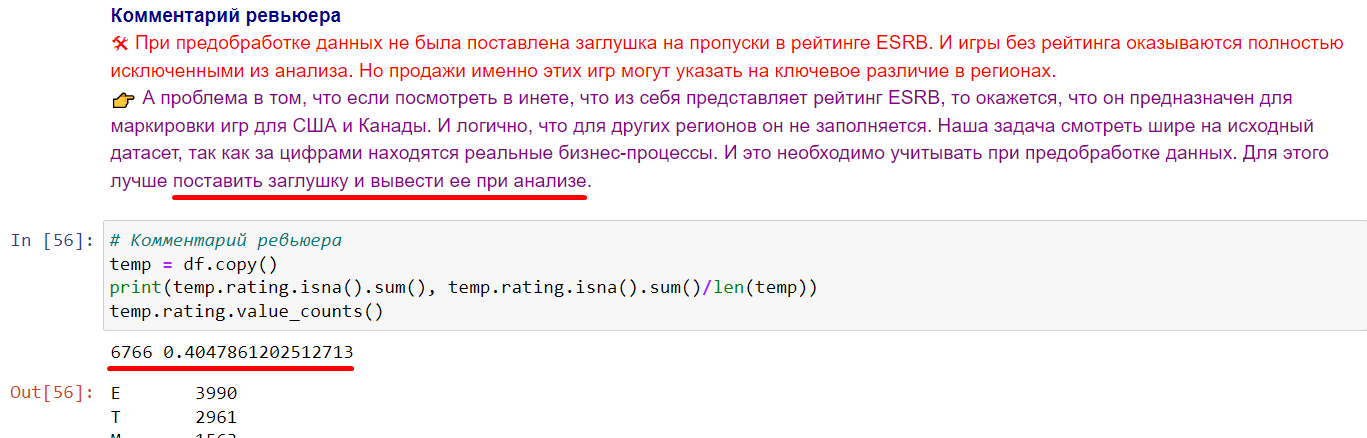

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 При предобработке данных не была поставлена заглушка на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И это необходимо учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [58]:
# Комментарий ревьюера
temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no rating    6765
E            3989
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: rating, dtype: int64

# 5. Проверка гипотез.

<font color='Blue'><b>Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой. 
Определим пороговое значение alpha = 0.05, t-критерий Стьюдента — общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках.</b></font><br>

<font color='Blue'><b>Проверка гипотез начинается с формулировки нулевой гипотезы H0. Исходя из H₀ формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H0. У нас есть 2 генеральные совокупности не зависящие друг от друга, В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind, так как выборки разные по размеру, параметр equal_var укажем как False. За нулевую гипотезу возьмем то утверждение, которое нам нужно проверить, за альтернативную - противоположное утверждение. В разделе 5.2 наоборот - об этом позднее.</b></font><br>

5.1 Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
H0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.\
(За нулевую гипотезу возьмем то утверждение, которое нам нужно проверить, за альтернативную - противоположное утверждение).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода.</font>

In [59]:
alpha = .05 # уровень статистческой значмости, если p-value окажется меньше него, отвергнем гипотезу.
xone_ratings = df.loc[(df['platform'] == 'XOne') & (df['year_of_release'] > 2012), 'user_score'].dropna()
pc_ratings = df.loc[(df['platform'] == 'PC') & (df['year_of_release'] > 2012), 'user_score'].dropna()

results = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [60]:
# посмотрим средние пользовательские рейтинги по платформам как иллюстрации не противоречивости наших гипотез.
display(xone_ratings.mean())
pc_ratings.mean()

6.521428571428572

6.2696774193548395

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо, что отфильтровали пропуски. Только для этого лучше использовать стандартные методы.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

Отвергаем нулевую гипотезу и принимаем альтернативную - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

5.2 Теперь проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\ <font color='Blue'><b>H0​ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.
Например, если вы исследуете, равна ли некоторая величина определённому числу, то нулевая гипотеза будет звучать так: «Да, равна». Если выясняете, есть ли разница между совокупностями, то нулевая гипотеза будет такая: «Разницы нет, исследуемые параметры равны». В данном случае мы аналитическую гипотезу о не равенстве средних рейтингов проверяем статистическими методами, точнее выбором критерия, применимого к нашим выборкам и формулированием нулевой и альтернативной статистических гипотез. Но данные гипотезы формулируются строго определенным образом и не зависят от формулировки нашей аналитической гипотезы. Поэтому наша альтернативная гипотеза будет противоположна нашей аналитической. </b></font><br>
H0 - средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.\
H1 - средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена.</font><br>
<font color='DarkMagenta'>👉 Ввело в заблуждение формулировка задачи.<br>
При исследовательском анализе мы формулируем аналитические гипотезы и проверяем их различными методами. Это может быть визуализация каких-то признаков, расчет параметров и т.д. В брифе на проект эти аналитические гипотезы уже сформированы в виде заданий. В данном случае мы аналитическую гипотезу о не равенстве средних рейтингов проверяем статистическими методами, точнее выбором критерия, применимого к нашим выборкам и формулированием нулевой и альтернативной статистических гипотез. Но данные гипотезы формулируются строго определенным образом и не зависят от формулировки нашей аналитической гипотезы.</font>
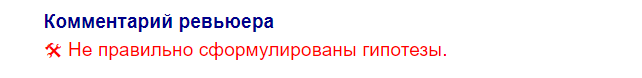

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильно сформулированы гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='Red'>🛠 Для анализа не используется датасет актуального периода.</font>

In [61]:
action_ratings = df.loc[(df['genre'] == 'Action') & (df['year_of_release'] > 2012), 'user_score'].dropna()
sports_ratings = df.loc[(df['genre'] == 'Sports') & (df['year_of_release'] > 2012), 'user_score'].dropna()

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)
alpha = 0.05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


p-value получился микроскопическим (в минус 20 степени), отвергаем нулевую гипотезу, и принимаем альтернативную - средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports. Что и требовалось доказать

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез, используя метод `.mean()`.</font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b><br>
То есть, необходимо описать принцип формулирования нулевой и альтернативной гипотез, обосновать почему к выборкам применили t-критерий при тестировании гипотез.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, не выполнено задание проекта. <br>Рекомендую прочитать статью: https://allatambov.github.io/psms/pdf/hypo-test.pdf</font>
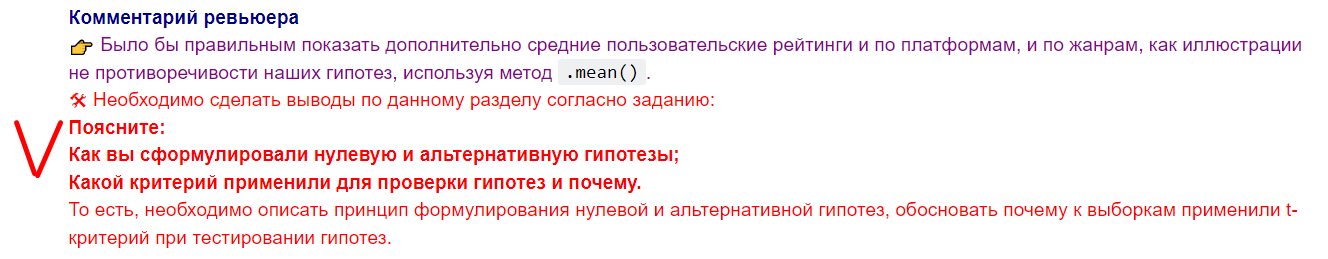

# 6. Выводы.

6.1 Ход исследования: Была выполнена подготовка данных, проведен исследовательский анализ данных, составлен портрет пользователя каждого региона и проверены гипотезы. 

6.2 Результаты: Наибольшее влияние на прибыль оказывают, в большинстве случаев, оценки критиков. Оценки пользователей таким воздействием на продажи похвастаться не могут.

Рынок компьютерных игр уже несколько лет падает, и, скорее всего, будет падать. Вероятнее всего на это влияет расцвет рынка мобильных игр. Заметна тенденция на упращение и массовость, самые популярные игры - жанра Action и Sports. Естественно, 
наибольшая аудитория - это дети и подростки. 

6.3 Рекомендации: наиболее потенциально успешный продукт и его рекламная компания должны быть рассчитаны на массовую аудиторию, на детей и подростков. 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель исследования понять, на что потратить рекламный бюджет. В исследовании проанализированы игры с разных сторон. Логично, что рекламный отдел ждет данные на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>Вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Андрей, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать проверку неявных дубликатов. Переделать проект в соответствии с требованиями к оформлению проекта. Графики и диаграммы необходимо оформить подписями осей и названием графика/диаграммы.Переделать построение гистограммы в динамике выпуска игр по годам релиза. Определить актуальный период и дальнейшие исследования проводить только за этот период. Построить диаграммы размаха по глобальным продажам игр в разбивке по всем платформам актуального периода, сделать выводы. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха. Переделать анализ влияния рейтинга ESRB на продажи в регионах. Необходимо правильно сформулировать гипотезы в тесте жанров. Необходимо сделать пояснения по разделу гипотез согласно заданию.<br>Обращаю внимание, что все графики/диаграммы проекта должны быть оформлены и после исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='Blue'><b>Сделана проверка неявных дубликатов, проект дооформлен, добавленны разделы и подразделы. Графики дооформленны, добавленны названия осей. Изменен выбо актуального периода исследования на 3 года. Переделано построение диаграммы в динамике выпуска игр по годам релиза. Определить актуальный период. Анализ влияния отзывов на продажи проведен по нескольким платформам и построены диаграммы рассеенья. Переделан анализ влияния рейтинга ESRB на продажи в регионах. В анализе игр по жанрам надо проанализированы медианные значения продаж. </b></font><br><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Ни чем не могу помочь, в проекте не выполняются задания инструкции.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Андрей, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Анализ проводить только за актуальный период. Переделать анализ влияния рейтинга ESRB на продажи в регионах. Необходимо правильно сформулировать гипотезы в тесте жанров. Необходимо сделать пояснения по разделу гипотез согласно заданию.<br>Надо будет проверить выводы,  при необходимости  откорректировать.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='Blue'><b>Еще исправления: заново проведен анализ за актуальный период (после 2012 года), Переделан анализ влияния рейтинга ESRB на продажи в регионах. Понял, что надо максимально правильно оформлять проект и делать больше наглядных графиков. Переформулированы гипотезы в тесте жанров. Сделаны пояснения по разделу гипотез согласно заданию. Проверены и откорректированы выводы.</b></font><br><br>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Андрей! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
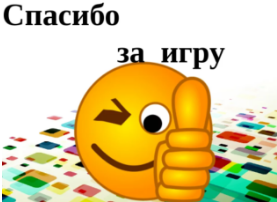